# Lecture 3 : Matrix representation and arithmetic

*May, 2022 - François HU*

*Master of Science - EPITA*

*This lecture is available here: https://curiousml.github.io/*

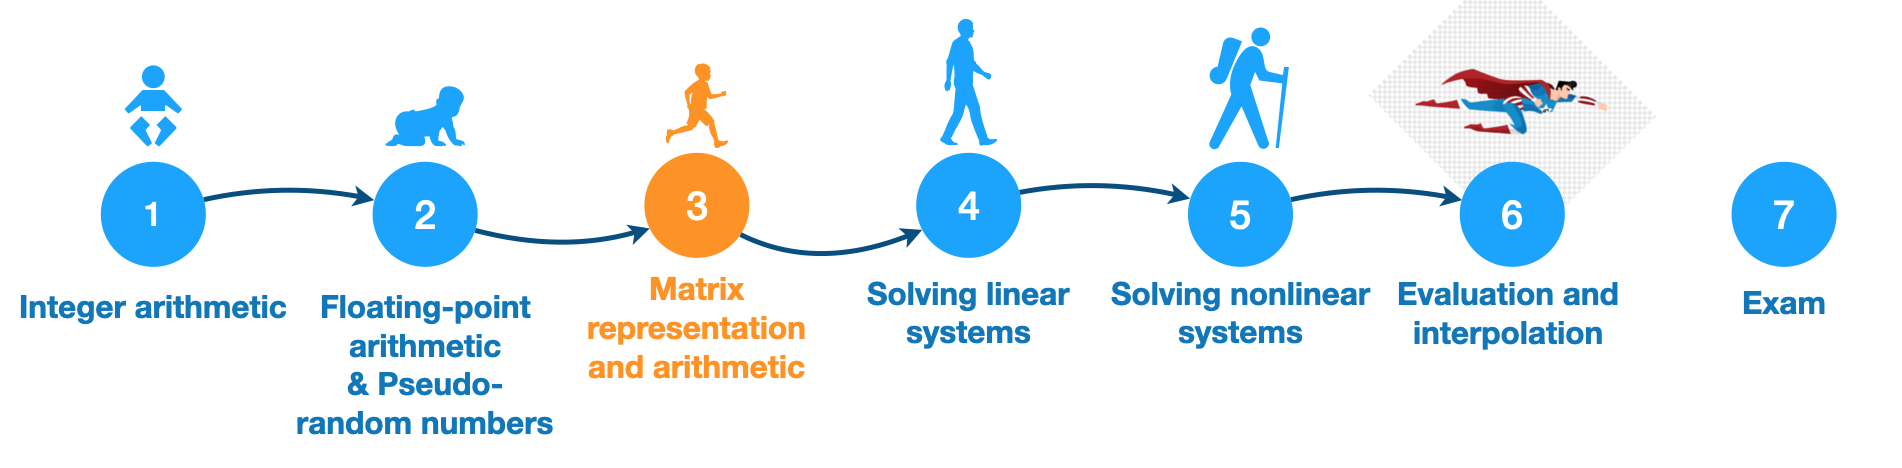

# Table of contents

1. [Linear algebra refresher](#1)
- [Vector arithmetic](#1.1)
- [Matrix arithmetic](#1.2)

2. [Exercices: Matrix arithmetic using python lists](#2)
- [Exercice 1: Inner product](#E1)
- [Exercice 2: Matrix addition](#E2)
- [Exercice 3: Matrix-vector multiplication](#E3)
- [Exercice 4: Naive Matrix multiplication](#E4)
- [Exercice 5: Matrix multiplication, improved version (Strassen 1969)](#E5)

3. [Matrix arithmetic using numpy arrays](#3)

The [ATLAS](http://math-atlas.sourceforge.net/) (Automatically Tuned Linear Algebra Software) project is an ongoing research effort focusing on applying empirical techniques in order to provide portable performance.

GEMM (for generic matrix multiplication)

# 1. Linear algebra: refresher on the basics <a name="1"></a>

More advanced notions will be seen in the **next lecture**.

## 1.1. Vector arithmetic<a name="1.1"></a>

- **Vectors** are ordered list of numbers written as:
$$x = \begin{bmatrix}
x_0\\
x_1\\
\vdots\\
x_{k-2}\\
x_{k-1}
\end{bmatrix}\in \mathbb{R}^k$$

- a number $x_i$ is called a **scalar**

- usual vectors: in dimension $k$,
$$
\mathbf{0} = \mathbf{0}_k = \begin{bmatrix}
0\\
0\\
\\
\vdots\\
\\
0\\
0\\
\end{bmatrix}, \quad
\mathbf{1} = \mathbf{1}_k = \begin{bmatrix}
1\\
1\\
\\
\vdots\\
\\
1\\
1\\
\end{bmatrix}, \quad 
e_i= \begin{bmatrix}
0\\
\vdots\\
0\\
1\\
0\\
\vdots\\
0
\end{bmatrix}
\begin{matrix}
\quad\\
\quad\\
\quad\\
\leftarrow i\text{-th position}\\
\quad\\
\quad\\
\quad
\end{matrix}
$$

### 1.1.1. vector-vector addition

$a,b\in\mathbb{R}^k$ two vectors of dimension $k$

$$a + b = \begin{bmatrix}
a_0\\
a_1\\
\vdots\\
a_{k-2}\\
a_{k-1}
\end{bmatrix}
+ 
\begin{bmatrix}
b_0\\
b_1\\
   \vdots\\
b_{k-2}\\
b_{k-1}
\end{bmatrix}
=
\begin{bmatrix}
a_0    +b_0    \\
a_1    +b_1    \\
\vdots\\
a_{k-2}+b_{k-2}\\
a_{k-1}+b_{k-1}
\end{bmatrix}$$
- **some properties of vector-vector addition:** $a, b, c\in\mathbb{R}^k$
    - *commutative:* $a + b = b + a$
    - *associative:* $(a + b) + c = a + (b + c)$
    - $a+0=0+a=a$ and $a - a = 0$

### 1.1.2. scalar-vector multiplication

$\lambda\in\mathbb{R}$ a scalar and $a\in\mathbb{R}^k$ a vector
$$\lambda
\times a = \lambda
\times
\begin{bmatrix}
a_0\\
a_1\\
\vdots\\
a_{k-2}\\
a_{k-1}
\end{bmatrix}
=
\begin{bmatrix}
\lambda\times a_0\\
\lambda\times a_1\\
\vdots \\
\lambda\times a_{k-2}\\
\lambda\times a_{k-1}
\end{bmatrix}$$


- **some properties of scalar-vector multiplication:** $\lambda, \gamma\in\mathbb{R}$ and $a, b\in\mathbb{R}^k$
    - *commutative:* $\lambda a = a\lambda \quad$ (it is more common to have $\lambda a$)
    - *associative:* $(\lambda  \gamma)  a = \lambda  (\gamma  a)$
    - *left distributive:* $(\lambda+\gamma) a = \lambda a + \gamma a$
    - *right distributive:* $\lambda (a+b) = \lambda a + \lambda b$

### 1.1.3. Inner product (or dot product)

$a,b\in\mathbb{R}^k$ two vectors of dimension $k$

$$<a, b> = a^T b = \begin{bmatrix}
a_0&
a_1&
\cdots&
a_{k-2}&
a_{k-1}
\end{bmatrix}
\times
\begin{bmatrix}
b_0\\
b_1\\
   \vdots\\
b_{k-2}\\
b_{k-1}
\end{bmatrix}
=
a_0    b_0    
+a_1  b_1    
+\cdots
+a_{k-2} b_{k-2}
+a_{k-1}b_{k-1}
$$

- **some properties of dot product:** $\lambda\in\mathbb{R}$ and $a, b, c\in\mathbb{R}^k$
    - $a^Tb = b^Ta $
    - $(\lambda a)^Tb= \lambda (a^Tb)$
    - $(a+b)^T c = a^Tc + b^Tc$
    - $(a + b)^T (c + d) = a^Tc + a^Td + b^Tc + b^Td$
    
    
- **some examples:**
    - $e_i^Ta = a_i$
    - $\mathbf{1}^Ta = a_0+\cdots+a_{k-1}$
    - $a^Ta = a_0^2+\cdots+a_{k-1}^2$

## 1.2. Matrix arithmetic <a name="1.2"></a>

- A **matrix** $A\in\mathbb{R}^{n\times m}$ of dimension $(n, m)$ is a rectangular array of $n\times m$ numbers ($n$ rows and $n$ columns) written as:

$$A = \begin{bmatrix}
a_{0, 0}& a_{0, 1}& \cdots & a_{0, m-1}\\
a_{1, 0}& a_{1, 1}& \cdots & a_{1, m-1}\\
\vdots&   \vdots&   \cdots & \vdots\\
a_{n-1, 0}&  a_{n-1, 1}&  \cdots & a_{n-1, m-1}
\end{bmatrix}\in\mathbb{R}^{n\times m}$$

- usual matrices:
$$
\mathbf{0}_{n, m} = \mathbf{0} = \begin{bmatrix}
0&\cdots &0\\
\vdots&\vdots&\vdots\\
0&\cdots &0\\
\end{bmatrix}\in\mathbb{R}^{n\times m}, \quad
I = \mathbf{I}_n = \begin{bmatrix}
1& 0& \cdots & 0\\
0& 1&  & \vdots\\
\vdots&   &   \ddots & 0\\
0&  \cdots&  0 & 1
\end{bmatrix}\in\mathbb{R}^{n\times n}\text{ (identity matrix) },\quad
\text{diag}(d_0, d_1, \cdots, d_n) = 
\begin{bmatrix}
d_0& 0& \cdots & 0\\
0& d_1&  & \vdots\\
\vdots&   &   \ddots & 0\\
0&  \cdots&  0 & d_n
\end{bmatrix}
$$

    - lower triangular matrix: $A_{i, j} = 0$ for $i<j$
    
    - upper triangular matrix: $A_{i, j} = 0$ for $i>j$

### 1.2.1. matrix-matrix addition and matrix-scalar multiplication

Like vectors we can add (and substract) matrices of the same size

**Matrix-matrix addition:** $A, B\in\mathbb{R}^{n\times m}$ two matrices of dimension $(n, m)$

$$A + B = \begin{bmatrix}
a_{0, 0}& \cdots & a_{0, m-1}\\
\vdots&   \cdots & \vdots\\
a_{n-1, 0}& \cdots & a_{n-1, m-1}
\end{bmatrix} +
\begin{bmatrix}
b_{0, 0}& \cdots & b_{0, m-1}\\
\vdots&     \cdots & \vdots\\
b_{n-1, 0}&  \cdots & b_{n-1, m-1}
\end{bmatrix} =
\begin{bmatrix}
a_{0, 0}+b_{0, 0}& \cdots & a_{0, m-1}+b_{0, m-1}\\
\vdots&    \cdots & \vdots\\
a_{n-1, 0}+b_{n-1, 0}&  \cdots & a_{n-1, m-1}+b_{n-1, m-1}
\end{bmatrix}
$$

**Matrix-scalar multiplication:** $A\in\mathbb{R}^{n\times m}$, $\lambda\in\mathbb{R}$

$$\lambda\times A = \begin{bmatrix}
\lambda \times a_{0, 0}& \cdots & \lambda \times a_{0, m-1}\\
\vdots&   \cdots & \vdots\\
\lambda \times a_{n-1, 0}& \cdots & \lambda \times a_{n-1, m-1}
\end{bmatrix}
$$

- **Obvious properties:**
    - $A+B = B+A$
    - $\lambda(A+B) = \lambda A + \lambda B$
    - $(A+B)^T = A^T + B^T$

### 1.2.2. matrix-vector multiplication

$A\in\mathbb{R}^{n\times m}, x\in\mathbb{R}^m$
$$A x = \begin{bmatrix}
a_{0, 0}& \cdots & a_{0, m-1}\\
\vdots&   \cdots & \vdots\\
a_{n-1, 0}& \cdots & a_{n-1, m-1}
\end{bmatrix} \times 
\begin{bmatrix}
x_{0}\\
\vdots\\
x_{m-1}
\end{bmatrix} =
\begin{bmatrix}
a_{0, 0} x_0 + \dots + a_{0, m-1} x_{m-1}\\
\vdots\\
a_{n-1, 0} x_0 + \dots + a_{n-1, m-1} x_{m-1}
\end{bmatrix}
$$

**Row interpretation:** $y = Ax$ is a "batch" inner product of all rows of $A$ with $x$

**Column interpretation:** $y = Ax = a_1x_1 + \dots a_{m-1}x_{m-1}$ is linear combination of columns $a_1, \dots a_{m-1}$ of $A$ with coefficients $x_1, \dots, x_{m-1}$

### 1.2.3. matrix-matrix multiplication

$A\in\mathbb{R}^{n\times p}$ and $B\in\mathbb{R}^{p\times m}$

$$
C = A\times B \in\mathbb{R}^{n\times m}
$$


with
$$C_{i, j} = \sum\limits_{k=1}^{p}A_{i, k}B_{k, j}
$$ 

for $i, j\in\{0, \dots, n-1\}\times\{0, \dots, m-1\}$

### 1.2.4. Other operations

- **Transpose** of matrix $A\in\mathbb{R}^{n, m}$, noted $A^T$, is such that it entries are flipped: for all $i, j$,

$$A^T_{i, j} = A_{j, i}$$

- **Inverse** of an invertible square matrix $A$, noted $A^{-1}$, is the only matrix such that 

$$
A^{-1}A = AA^{-1} = I
$$

- **Trace** of a square matrix $A$, noted $\text{tr}(A)$, is the sum of its diagonal entries

$$
\text{tr}(A) = \sum\limits_{i=1}^{n}A_{i, i}
$$

- **some properties:**
    - $(AB)C = A(BC)$
    - $A(B+C) = AB+AC$
    - $(AB)^T = B^TA^T$
    - $\textrm{tr}(A^T)=\textrm{tr}(A)$ and $\textrm{tr}(AB)=\textrm{tr}(BA)$
    - $AI=IA=A$
    - $AB\neq BA$

# 2. Exercices <a name="1"></a>

These exercices are supposed to enhance your **low-level programming skills**. Therefore let us set some restrictions:
- only python lists are used for arrays/vectors
- do not use some dedicated operation methods like `sum`

### Exercice 1: Inner product

Write a function that returns a scalar resulting from the inner product of two vectors $a, b\in\mathbb{R}^k$

### Exercice 2: Matrix addition

Write a function that returns a matrix resulting from the addition of two matrices $A, B\in\mathbb{R}^{n\times m}$

### Exercice 3: Matrix-vector multiplication

Write a function that returns a vector in $\mathbb{R}^{n}$ resulting from the multiplication $Ax$ with $A\in\mathbb{R}^{n\times m}$ and $x\in\mathbb{R}^{m}$

### Exercice 4: Naive Matrix multiplication

Write a function that returns a matrix in $\mathbb{R}^{n, m}$ resulting from the multiplication of two matrices $A\in\mathbb{R}^{n\times p}$ and $B\in\mathbb{R}^{p\times m}$

### Exercice 5: Matrix multiplication, improved version (Strassen 1969)

The [Strassen method](https://en.wikipedia.org/wiki/Strassen_algorithm) is an algorithm for matrix multiplication. This methdod is faster than the standard matrix multiplication algorithm for large matrices, with a better asymptotic complexity through a **divide-and-conquer** approach.

The key observation is that multiplying two $2 × 2$ matrices can be done with only $7$ multiplications, instead of the usual $8$.

If $n=2^t$ then we have the following recursive approach:

$$
\begin{bmatrix}
B_{0, 0} & B_{0, 1}\\
B_{1, 0} & B_{1, 1}
\end{bmatrix}
\times
\begin{bmatrix}
A_{0, 0}   &  A_{0, 1}\\
A_{1, 0} &  A_{1, 1}
\end{bmatrix}
=
\begin{bmatrix}
P_{0, 0}   &  P_{0, 1}\\
P_{1, 0}   &  P_{1, 1}
\end{bmatrix}
$$

with
$$
\begin{cases}
T_1 = (B_{0, 0}+B_{1, 1})\times(A_{0, 0}+A_{1, 1})\\
T_2 = (B_{1, 0}+B_{1, 1})\times A_{0, 0}\\
T_3 =  B_{0, 0}\times (A_{0, 1}-A_{1, 1})\\
T_4 =  B_{1, 1}\times (A_{1, 0}-A_{0, 0})\\
T_5 =  (B_{0, 0}+B_{0, 1})\times A_{1, 1}\\
T_6 =  (B_{1, 0}-B_{0, 0})\times (A_{0, 0}+A_{0, 1})\\
T_7 =  (B_{0, 1}-B_{1, 1})\times (A_{1, 0}+A_{1, 1})\\
\end{cases}\quad\text{,}\quad
\begin{cases}
P_{0, 0} = T_1+T_4-T_5+T_7\\
P_{0, 1} = T_3+T_5          \\
P_{1, 0} =  T_2+T_4        \\
P_{1, 1} = T_1-T_2+T_3+T_6     \\
\end{cases}
$$

and $P_{i, j}, A_{i, j}, B_{i,j}$ are matrices of dimension $\frac{n}{2}\times\frac{n}{2}$.


Write a function that returns the multiplication of two matrices $A\in\mathbb{R}^{n\times n}$ and $B\in\mathbb{R}^{n\times n}$ using the Strassen method. We assume that $n=2^t$ for $t\in\mathbb{N}$.

# 3.  Matrix arithmetic using numpy arrays

In [1]:
# We can use the package numpy of python

# Quick example of vector addition
import numpy as np

a = np.array([9, 3, 5, 7])
b = np.array([1, 4, -5, 2])
print(a + b)

# Quick example of scalar-vector multiplication
a = np.array([9, 3, 5, 7]) # array (vector)
c = -2                     # scalar
print(c * a)

[10  7  0  9]
[-18  -6 -10 -14]


In [2]:
# toy examples
u = 2 * np.ones(5)
v = np.arange(5)
A = np.diag([0.3, -0.3, 1, 2, 3])
print(u)
print(v)
print(A)

[2. 2. 2. 2. 2.]
[0 1 2 3 4]
[[ 0.3  0.   0.   0.   0. ]
 [ 0.  -0.3  0.   0.   0. ]
 [ 0.   0.   1.   0.   0. ]
 [ 0.   0.   0.   2.   0. ]
 [ 0.   0.   0.   0.   3. ]]


In [3]:
# dot product
print(u.dot(v))

20.0


In [4]:
# outer product
B = np.outer(u, v)
print(B)

[[0. 2. 4. 6. 8.]
 [0. 2. 4. 6. 8.]
 [0. 2. 4. 6. 8.]
 [0. 2. 4. 6. 8.]
 [0. 2. 4. 6. 8.]]


In [5]:
# Matrix product, different from A*B !
C = A.dot(B)
print(C)

[[ 0.   0.6  1.2  1.8  2.4]
 [ 0.  -0.6 -1.2 -1.8 -2.4]
 [ 0.   2.   4.   6.   8. ]
 [ 0.   4.   8.  12.  16. ]
 [ 0.   6.  12.  18.  24. ]]


In [6]:
# transpose of C
print(C.T)

[[ 0.   0.   0.   0.   0. ]
 [ 0.6 -0.6  2.   4.   6. ]
 [ 1.2 -1.2  4.   8.  12. ]
 [ 1.8 -1.8  6.  12.  18. ]
 [ 2.4 -2.4  8.  16.  24. ]]


In [7]:
# Toy example C
C = np.random.rand(5, 5)
C = C.dot(C.T) # for the sake of the lecture we include this step in order to ensure that the inverse exist